In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Assign Url & read the data
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

In [4]:
# import class
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [5]:
# Cleaning
df = EA.clean(df)

In [6]:
# Select the data from main data 
perfo_df = EA.PR_df(df)

In [7]:
perfo_df

,department,jobrole,joblevel,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,businesstravel,overtime,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,stockoptionlevel,jobsatisfaction,performancerating
employeenumber,,,,,,,,,,,,,,,,,,
1,sales,sales executive,2,0,6,4,0,5,11,travel_rarely,yes,1,2,3,1,0,4,3
2,research & development,research scientist,2,3,10,7,1,7,23,travel_frequently,no,3,3,2,4,1,2,4
4,research & development,laboratory technician,1,3,0,0,0,0,15,travel_rarely,yes,3,4,2,2,0,3,3
5,research & development,research scientist,1,3,8,7,3,0,11,travel_frequently,yes,3,4,3,3,0,3,3
7,research & development,laboratory technician,1,3,2,2,2,2,12,travel_rarely,no,3,1,3,4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,research & development,laboratory technician,2,3,5,2,0,3,17,travel_frequently,no,3,3,4,3,1,4,3
2062,research & development,healthcare representative,3,5,7,7,1,7,15,travel_rarely,no,3,4,2,1,1,1,3
2064,research & development,manufacturing director,2,0,6,2,0,3,20,travel_rarely,yes,3,2,4,2,1,2,4


In [8]:
cat_col = perfo_df.select_dtypes(include=['object'])
num_col = perfo_df.select_dtypes(include=[np.number]).drop(
            columns = ['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','performancerating','stockoptionlevel','jobsatisfaction']
            )
cat_col_num = perfo_df[['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','jobsatisfaction','stockoptionlevel']]

This Python code processes a DataFrame `perfo_df` to categorize its columns into three groups:

- `cat_col`: Selects columns with categorical (object) data types.
- `num_col`: Selects numeric columns, excluding specific columns: 'joblevel', 'worklifebalance', 'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction', 'performancerating', 'stockoptionlevel', and 'jobsatisfaction'.
- `cat_col_num`: Selects specific columns ('joblevel', 'worklifebalance', 'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction', 'jobsatisfaction', 'stockoptionlevel') that are likely treated as categorical despite being numeric.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

- `Pipeline`: Creates a sequence of data processing steps.
- `ColumnTransformer`: Applies different transformations to specific columns.
- `SimpleImputer`: Handles missing values by imputing them (e.g., with mean, median, or constant).
- `StandardScaler`: Standardizes numeric features by scaling them to a mean of 0 and variance of 1.
- `OrdinalEncoder`: Converts categorical variables into ordinal integers.

In [10]:
order_list = [  ['sales', 'research & development', 'human resources'],

                ['sales representative',
                'laboratory technician',
                'research scientist',
                'human resources',
                'sales executive',
                'manufacturing director',
                'healthcare representative',
                'research director',
                'manager'],

                ['non-travel','travel_rarely','travel_frequently'],

                ['no', 'yes']
             ]
# Likely used for ordinal encoding to assign specific integer values to categories based on their order.

In [11]:
num_trans = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
            ]
)
num_trans

# The pipeline is designed to preprocess numeric data consistently for machine learning tasks.

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [12]:
cat_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=order_list,dtype='int'))
    ]
)
cat_trans

# The pipeline is designed to preprocess categorical data by handling missing values and encoding categories ordinally for machine learning tasks.

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['sales', 'research & development', ...], ['sales representative', 'laboratory technician', ...], ...]"


In [13]:
cat_trans1 = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent'))
    ]
)
cat_trans1

# The pipeline is designed for basic preprocessing of categorical data by handling missing values, without additional encoding or transformation steps.

,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [14]:
preprocess = ColumnTransformer(
                transformers=[
                    ('num',num_trans,num_col.columns),
                    ('cat',cat_trans,cat_col.columns),
                    ('cat1',cat_trans1,cat_col_num.columns)
                ]
)
preprocess


,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


- `ColumnTransformer`: Applies distinct transformations to different subsets of columns.
- Transformers:
  - `num`: Applies the `num_trans` pipeline (imputation with median and standardization) to numeric columns listed in `num_col.columns`.
  - `cat`: Applies the `cat_trans` pipeline (imputation with most frequent value and ordinal encoding using `order_list`) to categorical columns listed in `cat_col.columns`.
  - `cat1`: Applies the `cat_trans1` pipeline (imputation with most frequent value) to columns listed in `cat_col_num.columns`, which are likely numeric columns treated as categorical.

This setup ensures tailored preprocessing for numeric and categorical columns in a machine learning workflow.

In [15]:
preprocess.fit(perfo_df)

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


- `preprocess.fit(perfo_df)`: Fits the ColumnTransformer to the data in `perfo_df`. This step:
  - Learns the parameters for each transformer in the pipelines (`num_trans`, `cat_trans`, `cat_trans1`) based on the data in the specified columns (`num_col.columns`, `cat_col.columns`, `cat_col_num.columns`).
  - For example, it calculates medians for numeric imputation, identifies most frequent values for categorical imputation, and maps categories to integers for ordinal encoding.

After fitting, the `preprocess` object is ready to transform `perfo_df` or other compatible data using the learned parameters

In [16]:
import pickle 
# pickle.dump(preprocess,open('PR_Preprocess.pkl','wb'))

# The saved file can be loaded later using `pickle.load` to apply the same preprocessing to new data.

In [17]:
P =pickle.load(open('PR_Preprocess.pkl','rb'))

In [18]:
x = pd.DataFrame(P.transform(perfo_df),columns=P.get_feature_names_out())
# Feature selection

In [19]:
x

,num__trainingtimeslastyear,num__yearsatcompany,num__yearsincurrentrole,num__yearssincelastpromotion,num__yearswithcurrmanager,num__percentsalaryhike,cat__department,cat__jobrole,cat__businesstravel,cat__overtime,cat1__joblevel,cat1__worklifebalance,cat1__environmentsatisfaction,cat1__jobinvolvement,cat1__relationshipsatisfaction,cat1__jobsatisfaction,cat1__stockoptionlevel
0,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,-1.150554,0.0,4.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,4.0,0.0
1,0.155707,0.488508,0.764998,-0.368715,0.806541,2.129306,1.0,2.0,2.0,0.0,2.0,3.0,3.0,2.0,4.0,2.0,1.0
2,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,-0.057267,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,3.0,0.0
3,0.155707,0.161947,0.764998,0.252146,-1.155935,-1.150554,1.0,2.0,2.0,1.0,1.0,3.0,4.0,3.0,3.0,3.0,0.0
4,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,-0.877232,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.155707,-0.327893,-0.615492,-0.679146,-0.314873,0.489376,1.0,1.0,2.0,0.0,2.0,3.0,3.0,4.0,3.0,4.0,1.0
1466,1.707500,-0.001333,0.764998,-0.368715,0.806541,-0.057267,1.0,6.0,1.0,0.0,3.0,3.0,4.0,2.0,1.0,1.0,1.0
1467,-2.171982,-0.164613,-0.615492,-0.679146,-0.314873,1.309341,1.0,5.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0
1468,0.155707,0.325228,0.488900,-0.679146,1.086895,-0.330589,0.0,4.0,2.0,0.0,2.0,2.0,4.0,2.0,4.0,2.0,0.0


In [20]:
y = perfo_df[['performancerating']]
# Target Selection

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# This prepares the data for training and evaluating a machine learning model.

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train, y_train)

# Implement Logistic Rgression

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
LR.predict(x_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3,

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      0.99      0.99       931
           4       0.93      1.00      0.96       171

    accuracy                           0.99      1102
   macro avg       0.96      0.99      0.98      1102
weighted avg       0.99      0.99      0.99      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      0.99      0.99       313
           4       0.93      1.00      0.96        55

    accuracy                           0.99       368
   macro avg       0.97      0.99      0.98       368
weighted avg       0.99      0.99      0.99       368

---------------------------------------------------------------------------


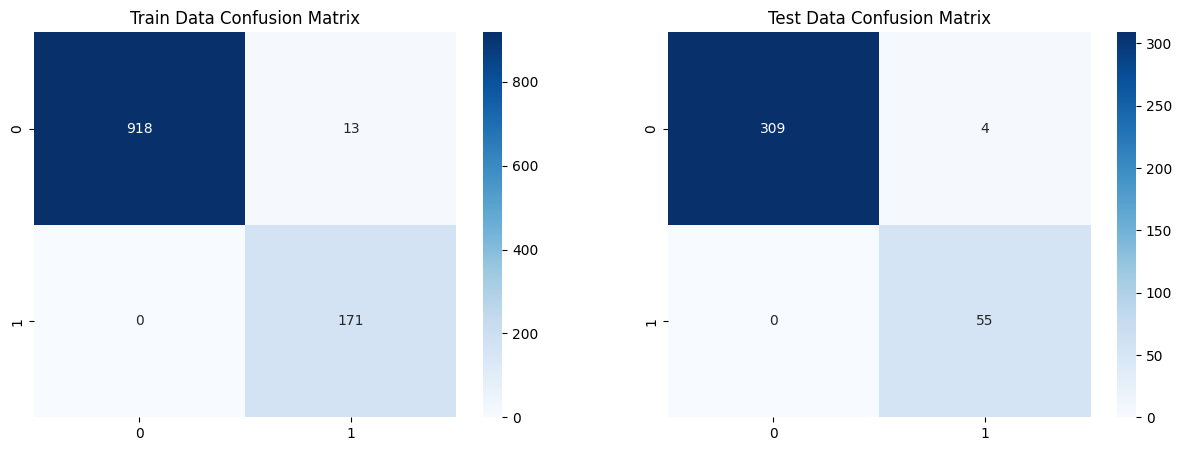

***************************************************************************


In [24]:
from sklearn.metrics import confusion_matrix,classification_report

y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pred))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pred))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

# Model Performance Report

## Summary
The Python code evaluates a Logistic Regression model (`LR`) on training and testing datasets, achieving 99% accuracy on both.

### Classification Metrics
- **Training Data** (1102 samples):
  - Class 3: Precision 1.00, Recall 0.99, F1-score 0.99 (Support: 931)
  - Class 4: Precision 0.93, Recall 1.00, F1-score 0.96 (Support: 171)
- **Testing Data** (368 samples):
  - Class 3: Precision 1.00, Recall 0.99, F1-score 0.99 (Support: 313)
  - Class 4: Precision 0.93, Recall 1.00, F1-score 0.96 (Support: 55)

### Visualization
- Confusion matrices for training and testing data are plotted as heatmaps using seaborn, showing true/false positives and negatives for each class.

### Conclusion
The model demonstrates excellent performance and generalization, with consistent metrics across training and testing sets.

In [25]:
y.value_counts()

performancerating
3                    1244
4                     226
Name: count, dtype: int64

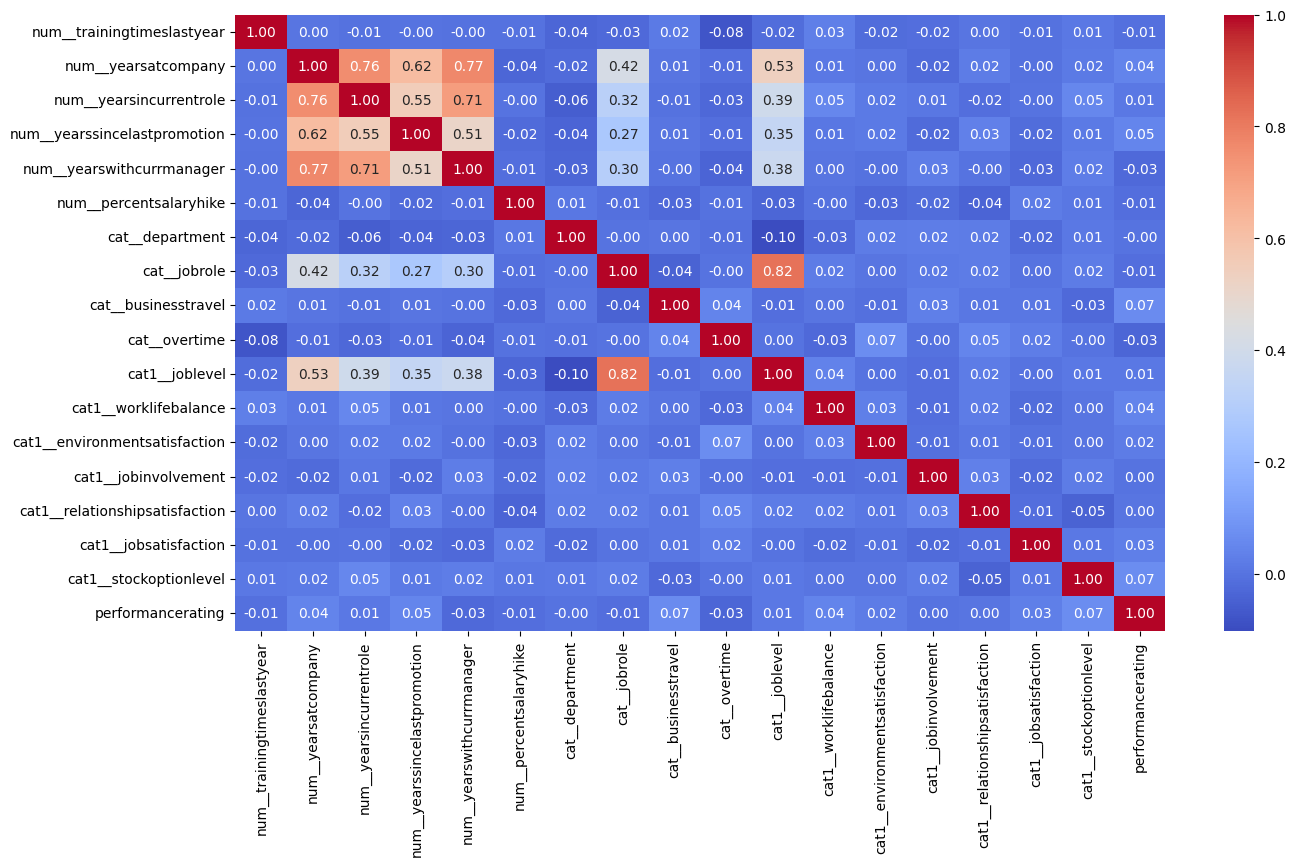

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([x,y],axis=1).corr(),annot = True,fmt='.2f',cmap = 'coolwarm')
plt.show()

In [27]:
# Balancing the data sample
from imblearn.over_sampling import RandomOverSampler
print("Original Data set y value:")
print(y.performancerating.value_counts())
print(25*'-')
ros = RandomOverSampler(random_state=42)
x_resampled,y_resampled = ros.fit_resample(x,y)
print("Balanced Data y value:")
print(y_resampled.performancerating.value_counts())
print(25*'-')

# The code outputs the class counts before and after balancing to show the effect of oversampling.

Original Data set y value:
performancerating
3    1244
4     226
Name: count, dtype: int64
-------------------------
Balanced Data y value:
performancerating
3    1244
4    1244
Name: count, dtype: int64
-------------------------


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)

# Split the data for train the model and evaluate 

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       929
           4       0.99      1.00      1.00       937

    accuracy                           1.00      1866
   macro avg       1.00      1.00      1.00      1866
weighted avg       1.00      1.00      1.00      1866

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      0.98      0.99       315
           4       0.98      1.00      0.99       307

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622

---------------------------------------------------------------------------


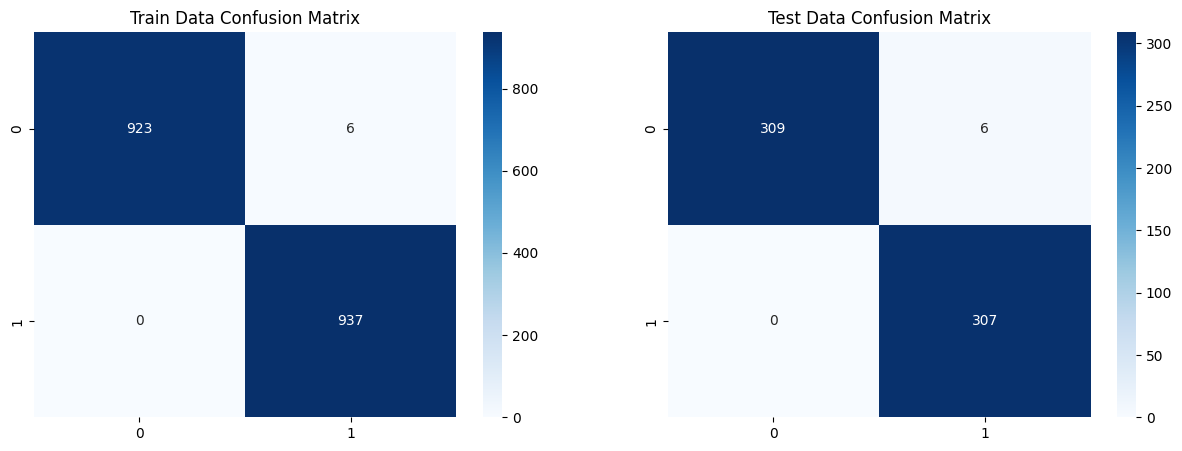

In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix,classification_report

y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pred))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pred))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()

# Model Performance Report After Balancing

## Summary
The Python code trains a Logistic Regression model (`LR`) on balanced training data (`x`, `y`) and evaluates its performance on both training and testing sets after applying `RandomOverSampler` to address class imbalance in `performancerating`.

### Classification Metrics
- **Training Data** (1866 samples):
  - Class 3: Precision 1.00, Recall 0.99, F1-score 1.00 (Support: 929)
  - Class 4: Precision 0.99, Recall 1.00, F1-score 1.00 (Support: 937)
  - Accuracy: 1.00
- **Testing Data** (622 samples):
  - Class 3: Precision 1.00, Recall 0.98, F1-score 0.99 (Support: 315)
  - Class 4: Precision 0.98, Recall 1.00, F1-score 0.99 (Support: 307)
  - Accuracy: 0.99

### Confusion Matrix Insights
- **Train Data Confusion Matrix**:
  - True Negatives (0,0): 923
  - False Positives (0,1): 6
  - False Negatives (1,0): 0
  - True Positives (1,1): 937
- **Test Data Confusion Matrix**:
  - True Negatives (0,0): 309
  - False Positives (0,1): 6
  - False Negatives (1,0): 0
  - True Positives (1,1): 307

### Conclusion
Balancing the data with `RandomOverSampler` resulted in a perfectly balanced training set (929 vs. 937 samples) and improved model performance, achieving 100% accuracy on training data and 99% on testing data. The confusion matrices show minimal misclassifications, indicating robust generalization post-balancing.

In [30]:
y_train.value_counts()

performancerating
4                    937
3                    929
Name: count, dtype: int64

In [31]:
y_test.value_counts()

performancerating
3                    315
4                    307
Name: count, dtype: int64

In [32]:
# pickle.dump(LR,open('PR_Model.pkl','wb'))

In [33]:
m = pickle.load(open('PR_Model.pkl','rb'))

In [34]:
perfo_df

,department,jobrole,joblevel,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,businesstravel,overtime,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,stockoptionlevel,jobsatisfaction,performancerating
employeenumber,,,,,,,,,,,,,,,,,,
1,sales,sales executive,2,0,6,4,0,5,11,travel_rarely,yes,1,2,3,1,0,4,3
2,research & development,research scientist,2,3,10,7,1,7,23,travel_frequently,no,3,3,2,4,1,2,4
4,research & development,laboratory technician,1,3,0,0,0,0,15,travel_rarely,yes,3,4,2,2,0,3,3
5,research & development,research scientist,1,3,8,7,3,0,11,travel_frequently,yes,3,4,3,3,0,3,3
7,research & development,laboratory technician,1,3,2,2,2,2,12,travel_rarely,no,3,1,3,4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,research & development,laboratory technician,2,3,5,2,0,3,17,travel_frequently,no,3,3,4,3,1,4,3
2062,research & development,healthcare representative,3,5,7,7,1,7,15,travel_rarely,no,3,4,2,1,1,1,3
2064,research & development,manufacturing director,2,0,6,2,0,3,20,travel_rarely,yes,3,2,4,2,1,2,4
